# **Import Dependencies**

In [ ]:
 !pip install detecto

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import numpy as np

from torchvision import transforms
from detecto import core, utils, visualize
from detecto.core import Dataset, DataLoader, Model
from detecto.visualize import show_labeled_image, plot_prediction_grid

# **Import Dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WSvtMP80wOwMwMczvdKo")
project = rf.workspace("universitas-gadjah-mada-kbjcl").project("capstone-b02-object-detection")
dataset = project.version(10).download("tensorflow")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Capstone-B02-Object-Detection-10 in tensorflow:: 100%|██████████| 124/124 [00:00<00:00, 3454.92it/s]


# **Object Detection Process**

In [ ]:
csv_path = '/content/Capstone-B02-Object-Detection-10/train/_annotations.csv'
df = pd.read_csv(csv_path)

# Buat kolom 'image_id' dengan inisialisasi nilai 0
df['image_id'] = 0

# Buat ID unik untuk setiap 'filename'
unique_filenames = df['filename'].unique()
for i, filename in enumerate(unique_filenames):
    df.loc[df['filename'] == filename, 'image_id'] = i

# Simpan dataframe yang telah diperbarui ke dalam file CSV
df.to_csv('/content/Capstone-B02-Object-Detection-10/train/_annotations_with_image_id.csv', index=False)

df

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,IMG_6719_jpg.rf.278ac63fcda95ba0a2da53e67a472c...,640,640,Kopi Gelondong,60,112,103,153,0
1,IMG_6719_jpg.rf.278ac63fcda95ba0a2da53e67a472c...,640,640,Kopi Gelondong,179,114,224,158,0
2,IMG_6719_jpg.rf.278ac63fcda95ba0a2da53e67a472c...,640,640,Kopi Gelondong,62,204,105,247,0
3,IMG_6719_jpg.rf.278ac63fcda95ba0a2da53e67a472c...,640,640,Kopi Gelondong,180,198,228,245,0
4,IMG_6719_jpg.rf.278ac63fcda95ba0a2da53e67a472c...,640,640,Kopi Gelondong,308,109,349,149,0
...,...,...,...,...,...,...,...,...,...
2845,IMG_6626_jpg.rf.fd48b46b05df9031e5d3ed94905b3a...,640,640,Kopi Gelondong,51,480,100,548,113
2846,IMG_6626_jpg.rf.fd48b46b05df9031e5d3ed94905b3a...,640,640,Kopi Gelondong,160,498,201,539,113
2847,IMG_6626_jpg.rf.fd48b46b05df9031e5d3ed94905b3a...,640,640,Kopi Gelondong,267,477,313,523,113
2848,IMG_6626_jpg.rf.fd48b46b05df9031e5d3ed94905b3a...,640,640,Kopi Gelondong,409,482,454,527,113


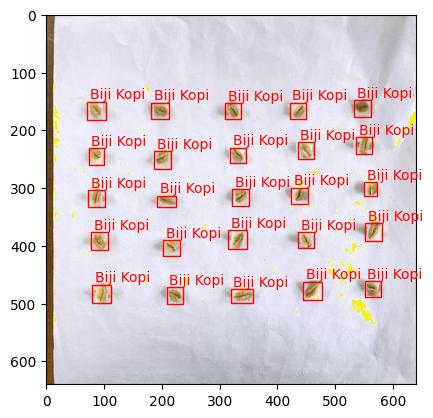

In [ ]:
# Definisikan dataset dengan mengambil data dari file CSV dan direktori gambar
dataset = core.Dataset('/content/Capstone-B02-Object-Detection-10/train/_annotations_with_image_id.csv',
                       '/content/Capstone-B02-Object-Detection-10/train/')

# Ambil gambar dan informasi target dari dataset
image, target = dataset[1]

# Tampilkan gambar bersama dengan kotak dan label yang sesuai
visualize.show_labeled_image(image, target['boxes'], target['labels'])

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:23<00:00,  2.38it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.42it/s]


Loss: 0.6965022398191586
Epoch 2 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:21<00:00,  2.60it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.56it/s]


Loss: 0.4759752173957072
Epoch 3 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.07it/s]


Loss: 0.41534340878327686
Epoch 4 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.59it/s]


Loss: 0.38486113987470927
Epoch 5 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.58it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  8.93it/s]


Loss: 0.37902439882357913
Epoch 6 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.55it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.90it/s]


Loss: 0.37661093094369824
Epoch 7 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.84it/s]


Loss: 0.3689937466069272
Epoch 8 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.63it/s]


Loss: 0.37045993682062417
Epoch 9 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.47it/s]


Loss: 0.3705811654789406
Epoch 10 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.44it/s]


Loss: 0.3692820350590505
Epoch 11 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:23<00:00,  2.44it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.51it/s]


Loss: 0.36931816017941427
Epoch 12 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.54it/s]


Loss: 0.37070981112488527
Epoch 13 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.52it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.77it/s]


Loss: 0.3709262014742483
Epoch 14 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.94it/s]


Loss: 0.37242760535394936
Epoch 15 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.95it/s]


Loss: 0.3713185243439256
Epoch 16 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.70it/s]


Loss: 0.37199659031211285
Epoch 17 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.60it/s]


Loss: 0.3702161976119928
Epoch 18 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.51it/s]


Loss: 0.3688531368970871
Epoch 19 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.33it/s]


Loss: 0.37019308996305134
Epoch 20 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.38it/s]


Loss: 0.36949594619504195
Epoch 21 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.56it/s]


Loss: 0.3708892224127786
Epoch 22 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.73it/s]


Loss: 0.36973650348291065
Epoch 23 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.92it/s]


Loss: 0.3710229434726531
Epoch 24 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.81it/s]


Loss: 0.3707041549578048
Epoch 25 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.80it/s]


Loss: 0.36836970584434375
Epoch 26 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.64it/s]


Loss: 0.3689007718573537
Epoch 27 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.50it/s]


Loss: 0.3726515240575138
Epoch 28 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.44it/s]


Loss: 0.36948266128698987
Epoch 29 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.49it/s]


Loss: 0.37016306229327856
Epoch 30 of 30
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:12<00:00,  9.48it/s]


Loss: 0.3699892680895956


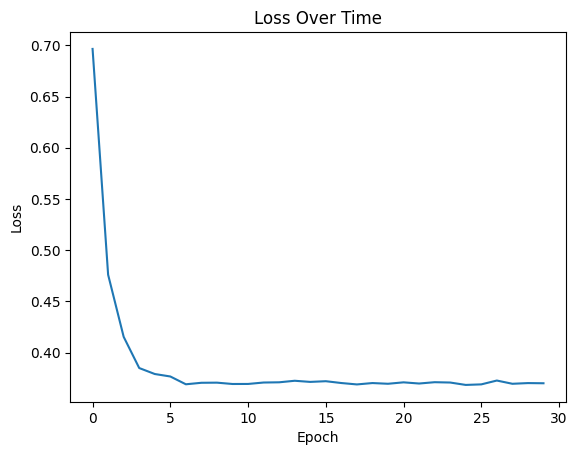

In [ ]:
# Buat dataset dan data loader
dataset = Dataset('/content/Capstone-B02-Object-Detection-10/train/_annotations_with_image_id.csv',
                  '/content/Capstone-B02-Object-Detection-10/train/')

loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Inisialisasi model Faster R-CNN dengan kelas target
model = core.Model(model_name='fasterrcnn_resnet50_fpn',classes=['Biji Kopi', 'Kopi Gelondong'])
#model = core.Model(['Biji Kopi', 'Kopi Gelondong'])

# Training model dan mengembalikan losses
losses = model.fit(loader, dataset, epochs=30, learning_rate=0.0005, verbose=True)

# Plot grafik perubahan loss
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.show()

In [ ]:
model.save('model_weights4.pth')

In [ ]:
model_od = core.Model.load('model_weights4.pth', ['Biji Kopi', 'Kopi Gelondong'])

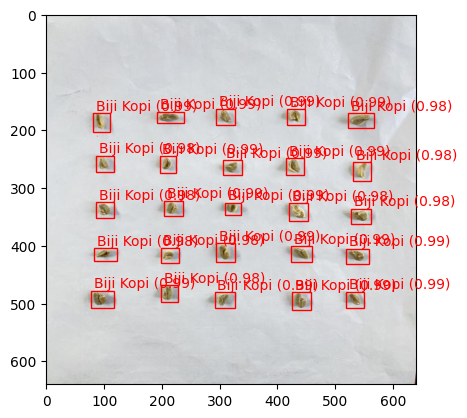

In [ ]:
image = utils.read_image("/content/Capstone-B02-Object-Detection-12/test/IMG_6690_jpg.rf.2a6a44cf94c724cca3e6c12d84c40243.jpg")
predictions = model_od.predict(image)
labels, boxes, scores = predictions

thresh = 0.5
filtered_indices = np.where(scores > thresh)
filtered_scores = scores[filtered_indices]
filtered_boxes = boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [f"{labels[i]} ({filtered_scores[j]:.2f})" for j, i in enumerate(num_list)]
show_labeled_image(image, filtered_boxes, filtered_labels)

# **Object Detection Evaluation**

In [ ]:
fname = os.listdir('/content/Capstone-B02-Object-Detection-10/train/')

# Inisialisasi list untuk menyimpan presisi per gambar
precision_per_image = []

for x in fname:
    path = os.path.join('/content/Capstone-B02-Object-Detection-10/train/', x)

    try:
        image = utils.read_image(path)

        # Melakukan prediksi deteksi objek pada gambar
        predictions = model_od.predict(image)
        labels, boxes, scores = predictions

        # Menentukan threshold untuk skor prediksi
        thresh = 0.5

        # Mengambil indeks yang sesuai dengan skor di atas threshold
        filtered_indices = np.where(scores > thresh)
        filtered_scores = scores[filtered_indices]
        filtered_boxes = boxes[filtered_indices]

        # Mendapatkan daftar indeks objek yang terdeteksi
        num_list = filtered_indices[0].tolist()
        filtered_labels = [labels[i] for i in num_list]

        # Menghitung jumlah true positives (tp) dan false positives (fp)
        scores_per_beans = np.array(filtered_scores)
        tp = 0
        fp = 0
        for score in scores_per_beans:
            if score >= 0.8:
                tp += 1
            else:
                fp += 1

        # Menghitung presisi per gambar
        precision = tp / (tp + fp)
        precision_per_image.append(precision)

    except Exception as e:
        # Menangani error
        print(f"Error processing image {x}: {str(e)}")

# Menghitung rata-rata skor mAP
if precision_per_image:
    print("Skor mAP dari Algoritma Deteksi Objek yang digunakan adalah " + str(np.array(precision_per_image).mean()))
else:
    print("No images could be processed.")

Error processing image _annotations_with_image_id.csv: Could not convert image color: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image _annotations.csv: Could not convert image color: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Skor mAP dari Algoritma Deteksi Objek yang digunakan adalah 0.9480395974709344


# **Fine Tuning**

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.


Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:23<00:00,  2.47it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.71it/s]


Loss: 0.9017554464047415
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:21<00:00,  2.60it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.78it/s]


Loss: 0.6718484239097227
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.87it/s]


Loss: 0.5546422375921618
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.56it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.78it/s]


Loss: 0.5384143716410587
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.58it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.94it/s]


Loss: 0.5300308073821821
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.57it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.74it/s]


Loss: 0.5249510846639934
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.58it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.83it/s]


Loss: 0.5270404985599351
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.58it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.69it/s]


Loss: 0.5202533296848598
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:22<00:00,  2.58it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.75it/s]


Loss: 0.5218104257395393
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 57/57 [00:23<00:00,  2.46it/s]


Begin iterating over validation dataset


100%|██████████| 114/114 [00:11<00:00,  9.68it/s]


Loss: 0.524008907247008


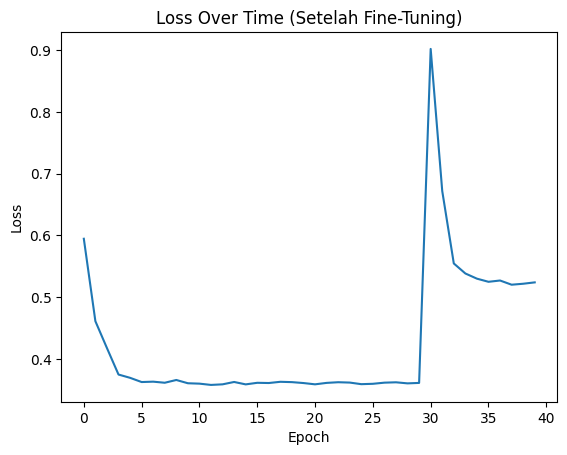

In [ ]:
# Inisialisasi model Faster R-CNN dengan kelas target yang sama
model_fine_tuned = core.Model(model_name='fasterrcnn_resnet50_fpn',classes=['Biji Kopi', 'Kopi Gelondong'])
#model_fine_tuned = core.Model(['Biji Kopi', 'Kopi Gelondong'])

# Fine-tuning dengan jumlah epoch tambahan dan learning rate yang lebih kecil
fine_tuning_epochs = 10
fine_tuning_learning_rate = 0.0001
fine_tuning_losses = model_fine_tuned.fit(loader, dataset, epochs=fine_tuning_epochs, learning_rate=fine_tuning_learning_rate, verbose=True)

# Plot grafik perubahan loss setelah fine-tuning
plt.plot(losses + fine_tuning_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time (Setelah Fine-Tuning)')
plt.show()

In [ ]:
# Evaluasi model setelah fine-tuning
fname = os.listdir('/content/Capstone-B02-Object-Detection-10/train/')

# Inisialisasi list untuk menyimpan presisi per gambar
precision_per_image_fine_tuned = []

for x in fname:
    path = os.path.join('/content/Capstone-B02-Object-Detection-10/train/', x)

    try:
        image = utils.read_image(path)

        # Melakukan prediksi deteksi objek pada gambar dengan model yang sudah fine-tuned
        predictions = model_fine_tuned.predict(image)
        labels, boxes, scores = predictions

        # Menentukan threshold untuk skor prediksi
        thresh = 0.5

        # Mengambil indeks yang sesuai dengan skor di atas threshold
        filtered_indices = np.where(scores > thresh)
        filtered_scores = scores[filtered_indices]
        filtered_boxes = boxes[filtered_indices]

        # Mendapatkan daftar indeks objek yang terdeteksi
        num_list = filtered_indices[0].tolist()
        filtered_labels = [labels[i] for i in num_list]

        # Menghitung jumlah true positives (tp) dan false positives (fp)
        scores_per_beans = np.array(filtered_scores)
        tp = 0
        fp = 0
        for score in scores_per_beans:
            if score >= 0.8:
                tp += 1
            else:
                fp += 1

        # Menghitung presisi per gambar setelah fine-tuning
        precision = tp / (tp + fp)
        precision_per_image_fine_tuned.append(precision)

    except Exception as e:
        # Menangani error
        print(f"Error processing image {x}: {str(e)}")

# Menghitung rata-rata skor mAP setelah fine-tuning
if precision_per_image_fine_tuned:
    print("Skor mAP setelah fine-tuning adalah " + str(np.array(precision_per_image_fine_tuned).mean()))
else:
    print("No images could be processed after fine-tuning.")


Error processing image _annotations_with_image_id.csv: Could not convert image color: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Error processing image _annotations.csv: Could not convert image color: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

Skor mAP setelah fine-tuning adalah 0.8610914059468984


# **Testing**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


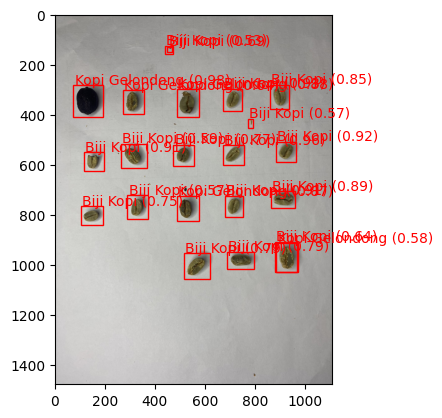

In [ ]:
image = utils.read_image("/content/drive/MyDrive/Capstone/S__13066243.jpg")
predictions = model_od.predict(image)
labels, boxes, scores = predictions

thresh = 0.5
filtered_indices = np.where(scores > thresh)
filtered_scores = scores[filtered_indices]
filtered_boxes = boxes[filtered_indices]
num_list = filtered_indices[0].tolist()
filtered_labels = [f"{labels[i]} ({filtered_scores[j]:.2f})" for j, i in enumerate(num_list)]
show_labeled_image(image, filtered_boxes, filtered_labels)